In [1]:
#For Kaggle
#date=''

#For WL data
source='WL'
date='20241118'

saveImage=False

print('done')

done


In [2]:
import sys
import os
from importlib import reload
fpath = os.path.join('..//scripts')
sys.path.append(fpath)

import warnings
warnings.filterwarnings('ignore')

#loading internal scripts
import frauddetection as fd
import sourcedata as sd
import dataimport as di
import result as resultMd
reload(fd)
reload(sd)
reload(di)
reload(resultMd)

print('done')

done


In [3]:
import pandas as pd

dfTrx = pd.read_csv('../data/cleaned/'+source+'export'+date+'.csv')
dfTrx.head(5)

,db_uuid,trx_date_time,term_mcc,term_country,mcd_fraud_score,vaa_score,TRX_3D_SECURED,trx_accepted,trx_cnp,card_pan_id,...,clusterCardHolder_cluster4,clusterMerchant_M0,clusterMerchant_M1,clusterMerchant_M2,clusterMerchant_M3,clusterMerchant_UNKNOWN,nbPreviousTrx,previousTrxAmountSumLog,trx_amount_log10,distancePrevTrx
0,A3DEF420A53B11EFABA49D2778D26ADA,2024-11-18 00:25:43,5499,NLD,289.000000,26.258093,0,1,1,A4BF631BFD796F0D7D9A714E5AD1F5D26E8D70A4999F30...,...,0,1,0,0,0,0,0,0.0,1.763353,1.100000
1,31BFAC76A53C11EFABA49D2778D26ADA,2024-11-18 00:30:44,4215,BEL,148.000000,26.258093,1,1,1,6048F88F23C4D90D50615342B2445A0CD680E3D102E56C...,...,0,0,0,0,1,0,0,0.0,1.330617,0.768071
2,75A6059CA53811EFA6F9EF55A8E51A55,2024-11-18 00:03:02,5968,FRA,363.000000,26.258093,0,1,1,6081849BC94C237C841CDC43E06CAB46A25F9BE5DE3DF3...,...,0,1,0,0,0,0,0,0.0,0.902547,1.100000
3,C5DEFDAAA53A11EFAAA0DF784AB5695E,2024-11-18 00:09:37,5812,USA,225.222235,26.258093,0,1,0,60E1D8C417CDFDE242B10454048AEEF15CF15C39251BE1...,...,0,0,0,0,0,1,0,0.0,1.563837,1.000000
4,D4F9F3CCA53E11EFAB1F43D36D9BDFD5,2024-11-18 00:48:47,5942,LUX,225.222235,30.000000,0,1,0,AFEEC568C21C0640F97EACED2F4D9B25537D94CE391457...,...,1,1,0,0,0,0,0,0.0,1.546049,1.100000


# Test with default hyperparameters

Duration  11.285531
test-set confusion matrix:
 [[211690     20]
 [   242     18]]
accuracy score: 0.9988
balanced accuracy score: 0.5346
recall score: 0.0692
precision score: 0.4737
f1 score: 0.1208
mcc score: 0.1807
roc auc score: 0.5346
test-set confusion matrix:
 [[846826     13]
 [   687    353]]
accuracy score: 0.9992
balanced accuracy score: 0.6697
recall score: 0.3394
precision score: 0.9645
f1 score: 0.5021
mcc score: 0.5719
roc auc score: 0.6697
test-set confusion matrix:
 [[211690     20]
 [   242     18]]
accuracy score: 0.9988
balanced accuracy score: 0.5346
recall score: 0.0692
precision score: 0.4737
f1 score: 0.1208
mcc score: 0.1807
roc auc score: 0.5346


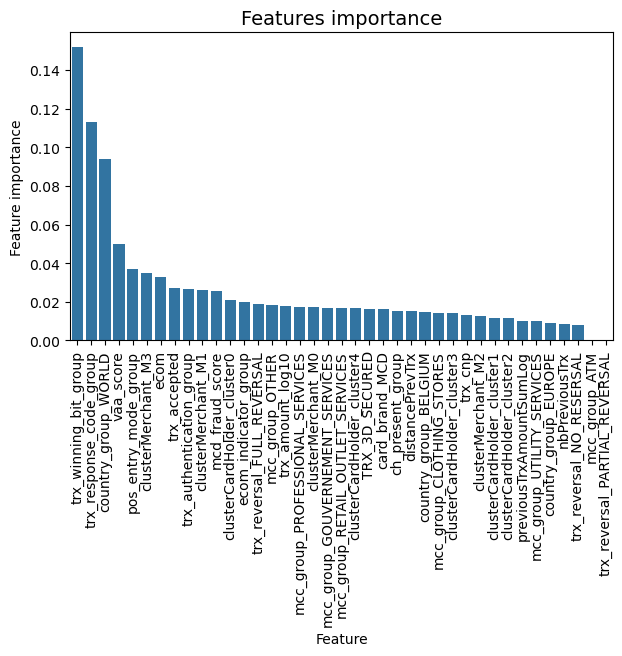

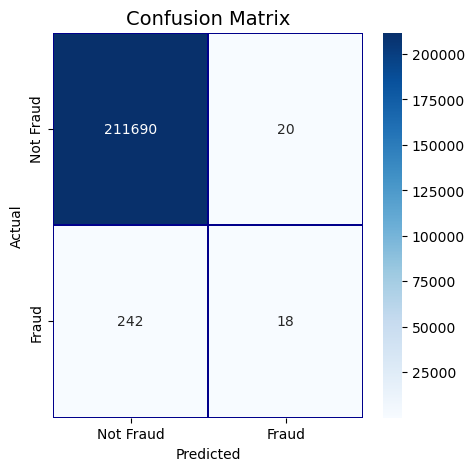

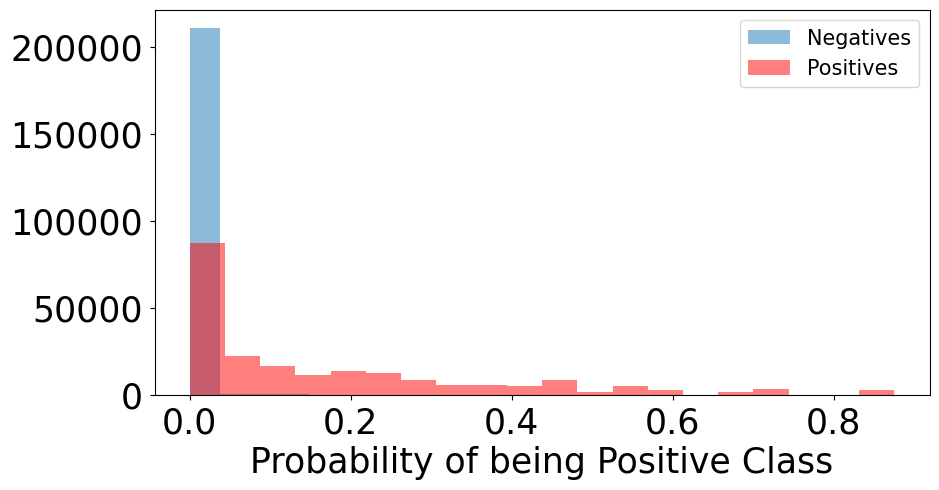

In [5]:
import xgboost as xgb
import matplotlib.pyplot as plt
from datetime import datetime

then= datetime.now()
predictors = fd.getPredictors(dfTrx)

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)

modelClf = xgb.XGBClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)
resultMd.update_time_response_result('08-xgboost','XGBClassifier','1-Default', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
resultMd.update_performance_test_result('08-xgboost','XGBClassifier','1-Default', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

# result 24/01/2025
#train f1 score: 0.1902 mcc score: 0.3061 roc auc score: 0.5533
#test  f1 score: 0.0972 mcc score: 0.1638 roc auc score: 0.5269

In [6]:
%%script false
# scaling choice

import matplotlib.pyplot as plt
import numpy as np

predictors = fd.getPredictors(dfTrx)
parameters={}
#parameters['max_iter']=1000

modelClf = xgb.XGBClassifier()
duration_in_s,f1Train,f1Test, scaler = fd.processModel(modelClf,dfTrx, predictors,[], parameters, scaler=None)
scalers = fd.getScalers()
for key in scalers:
    print(key)
    scaler=scalers.get(key)
    modelClf = xgb.XGBClassifier()
    duration_in_s,f1Train,f1Test, scaler = fd.processModel(modelClf,dfTrx, predictors, [],parameters,scaler=scaler)

# scaler has no adding value for the result

Couldn't find program: 'false'


# Hyperparameters tuning
starting point
n_estimators=50,learning_rate=1

# set learning rate low to avoid overfitting 0.005

In [9]:
%%script false
from scipy.stats import randint

modelClf = xgb.XGBClassifier()
# starting point n_estimators=100,  max_depth=7 
dic_param={
    'n_estimators':randint(300,500),
    'max_depth':randint(10,18), 
    'learning_rate': [0.005],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1.0]
}

res=fd.hyperparameterSelectionRandomizedSearchCV(modelClf, dic_param, 'f1', dfTrx, predictors, [], None)
print(res)
# result (08/03/2025)
#{'colsample_bytree': 1.0, 'learning_rate': 0.005, 'max_depth': 13, 'n_estimators': 425, 'subsample': 1.0}
#0.058454020118427624
#score   0.1773308957952468
#scoref1 0.1773308957952468

Couldn't find program: 'false'


In [10]:
%%script false
modelClf = xgb.XGBClassifier()

dic_param={
    'n_estimators':[400,410,420,430,440],
    'max_depth':[11,12,13,14,15],
    'learning_rate': [0.005],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1.0]
}


res=fd.hyperparameterSelectionGridSearchCV(modelClf, dic_param, 'f1', dfTrx, predictors, [], None)
print(res)

#24/02/2025
#{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 11, 'n_estimators': 430, 'subsample': 0.8}
#0.16830577955695836
#scoref1 0.7415592387968079


Couldn't find program: 'false'


Duration  39.776605
test-set confusion matrix:
 [[211697     13]
 [   252      8]]
accuracy score: 0.9987
balanced accuracy score: 0.5154
recall score: 0.0308
precision score: 0.3810
f1 score: 0.0569
mcc score: 0.1080
roc auc score: 0.5154
test-set confusion matrix:
 [[846832      7]
 [   820    220]]
accuracy score: 0.9990
balanced accuracy score: 0.6058
recall score: 0.2115
precision score: 0.9692
f1 score: 0.3473
mcc score: 0.4526
roc auc score: 0.6058
test-set confusion matrix:
 [[211697     13]
 [   252      8]]
accuracy score: 0.9987
balanced accuracy score: 0.5154
recall score: 0.0308
precision score: 0.3810
f1 score: 0.0569
mcc score: 0.1080
roc auc score: 0.5154


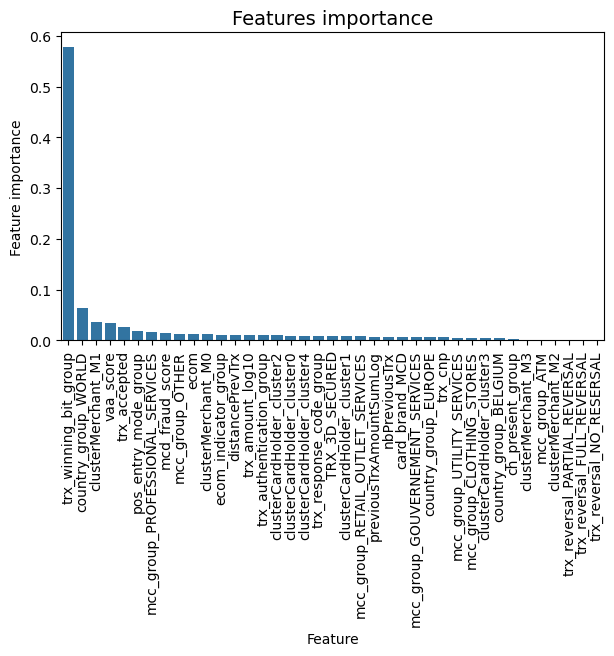

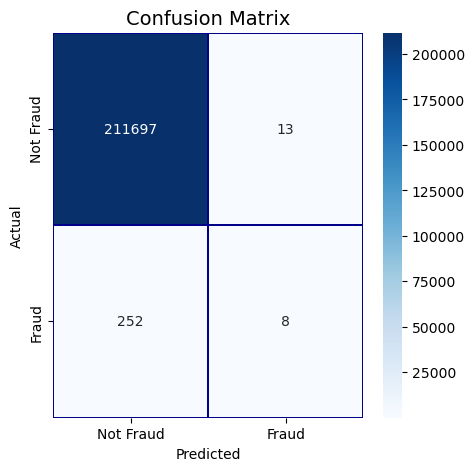

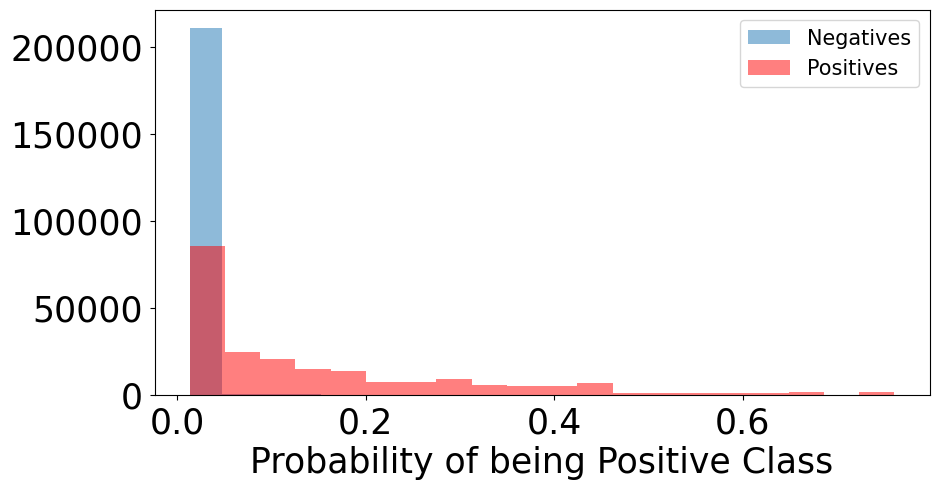

In [11]:
import xgboost as xgb
import matplotlib.pyplot as plt
from datetime import datetime

then= datetime.now()
predictors = fd.getPredictors(dfTrx)

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)
parameters= {'colsample_bytree': 1.0, 'learning_rate': 0.005, 'max_depth': 15, 'n_estimators': 440, 'subsample': 1.0}


modelClf = xgb.XGBClassifier()
modelClf.set_params(**parameters)
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)
resultMd.update_time_response_result('08-xgboost','XGBClassifier','2-After tuning', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
resultMd.update_performance_test_result('08-xgboost','XGBClassifier','2-After tuning', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

## result  (26/01/2025)
#test f1 score: 0.1286 mcc score: 0.1592 roc auc score: 0.5403


export20241118.csv
test-set confusion matrix:
 [[1058529      20]
 [   1072     228]]
accuracy score: 0.9990
balanced accuracy score: 0.5877
recall score: 0.1754
precision score: 0.9194
f1 score: 0.2946
mcc score: 0.4013
roc auc score: 0.5877


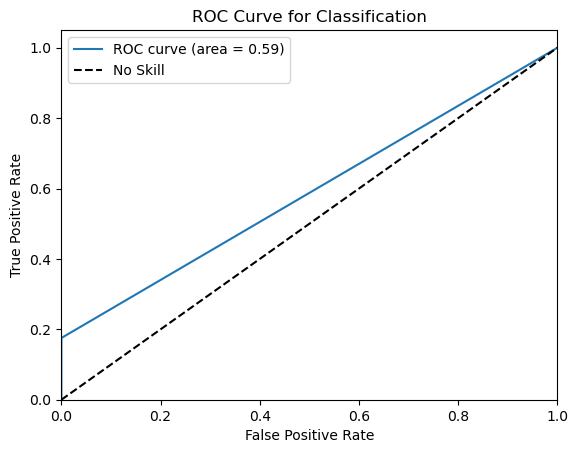

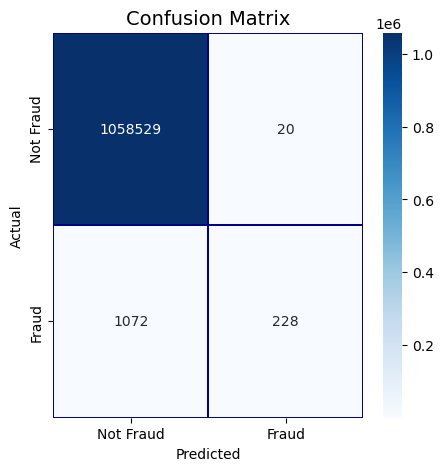

export20241119.csv
test-set confusion matrix:
 [[988797     63]
 [  1162     36]]
accuracy score: 0.9988
balanced accuracy score: 0.5150
recall score: 0.0301
precision score: 0.3636
f1 score: 0.0555
mcc score: 0.1043
roc auc score: 0.5150


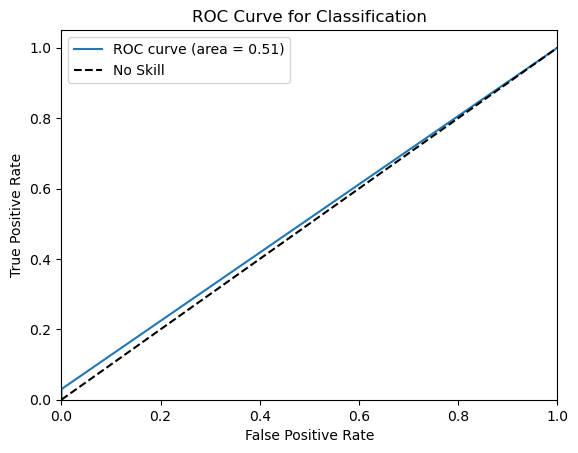

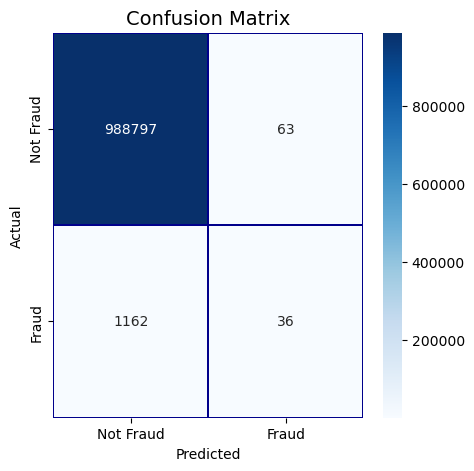

export20241120.csv


KeyboardInterrupt: 

In [12]:
files = fd.getAllFiles()

range = []
f1s = []
rocs = []
loop =0
for file in files:
    loop=loop+1
    range.append(loop)
    print(file)
  
    dfTrx = pd.read_csv('../data/cleaned/'+source+file)
    predictors = fd.getPredictors(dfTrx)

    preds = modelClf.predict(dfTrx[predictors])

    f1,mcc,roc= fd.print_scores(dfTrx['Class'], preds,'All', True)
    #fd.show_importance(modelClf,predictors)
    fd.show_confusion_matrix(dfTrx['Class'], preds)
    f1s.append(f1)
    rocs.append(roc)

fd.plt_train_test(range, f1s)
resultMd.update_performance_nextdays_result('08-xgboost','XGBClassifier','2-After tuning', f1s[0],f1s[1],f1s[2],f1s[3],rocs[0],rocs[1],rocs[2],rocs[3])
